In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
from pandas.plotting import table
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import sys

# Set the seaborn style
sns.set(style="whitegrid")
# Add the path to the constants file to the system path
sys.path.append('../../')
from constants import *


In [3]:
# Existing data
data = {
    "Methods": ["Paper's MF [1]", "Paper's MLP [2]", "Paper's (zero-shot) [3]", "Paper's (few-shot) [3]"],
    "Dataset": ["Unknown", "Unknown", "Unknown Amazon", "Unknown Amazon"],
    "Features": ["title", "title", "title", "title"],
    "RMSE": [1.1973, 1.3078, 1.4059, 1.0751],
    "CI_RMSE": ["-", "-", "-", "-"],
    "StdError_RMSE": ["-", "-", "-", "-"],
    "MAE": [0.9461, 0.9597, 1.1861, 0.6977],
    "CI_MAE": ["-", "-", "-", "-"],
    "StdError_MAE": ["-", "-", "-", "-"],
    "Wall Time": ["-", "-", "-", "-"]
}

# Convert the existing data dictionary to a DataFrame
df = pd.DataFrame(data)

# New data to add
new_data = [
    {"Methods": "Thu's zero-shot GPT", "Dataset": "Large Amazon", "Features": "title", 
     "RMSE": 1.1315, "CI_RMSE": "(1.1148, 1.1482)", "StdError_RMSE": 0.0002, 
     "MAE": 0.9922, "CI_MAE": "(0.9814, 1.0030)", "StdError_MAE": 0.0001, 
     "Wall Time": "1d 4h 38min 52s"},
    
    {"Methods": "Thu's few-shot GPT (1 test/user)", "Dataset": "Large Amazon", "Features": "title", 
     "RMSE": 0.9362, "CI_RMSE": "(0.8892, 0.9846)", "StdError_RMSE": 0.0005, 
     "MAE": 0.5809, "CI_MAE": "(0.5453, 0.6166)", "StdError_MAE": 0.0004, 
     "Wall Time": "3h 3min 8s"},

    {"Methods": "Thu's zero-shot GPT MovieLens", "Dataset": "MovieLens", "Features": "title", 
     "RMSE": 2.1204, "CI_RMSE": "(2.0606, 2.1791)", "StdError_RMSE": 0.0006, 
     "MAE": 1.4233, "CI_MAE": "(1.3714, 1.4757)", "StdError_MAE": 0.0005, 
     "Wall Time": "7h 32min 44s"},

    {"Methods": "Thu's few-shot GPT (1 test/user) MovieLens", "Dataset": "MovieLens", "Features": "title", 
     "RMSE": 0.9587, "CI_RMSE": "(0.7071, 1.2107)", "StdError_RMSE": 0.0025, 
     "MAE": 0.7743, "CI_MAE": "(0.5455, 1.0227)", "StdError_MAE": 0.0024, 
     "Wall Time": "2min 26s"}
]


# New additional evaluation data
additional_data = [
    {"Methods": "Thu's CF GPT (1 rating/1 similar user)", "Dataset": "Large Amazon", "Features": "title", 
     "RMSE": 2.0794, "CI_RMSE": "(2.0328, 2.1269)", "StdError_RMSE": 0.0005, 
     "MAE": 1.8354, "CI_MAE": "(1.7879, 1.8840)", "StdError_MAE": 0.0005, 
     "Wall Time": "28min 40s"},
    
    {"Methods": "Thu's CF GPT (1 rating/1 similar user)", "Dataset": "MovieLens 1M", "Features": "title", 
     "RMSE": 1.2885, "CI_RMSE": "(1.2672, 1.3102)", "StdError_RMSE": 0.0002, 
     "MAE": 1.0032, "CI_MAE": "(0.9826, 1.0238)", "StdError_MAE": 0.0002, 
     "Wall Time": "1h 20min 18s"}
]

# Append the new data
df = pd.concat([df, pd.DataFrame(new_data), pd.DataFrame(additional_data)], ignore_index=True)

# Additional entries to be added
more_data = [
    {"Methods": "Thu's Few shot CF GPT", "Dataset": "MovieLens 1M", "Features": "title", 
     "RMSE": 0.4336, "CI_RMSE": "(0.4193, 0.4483)", "StdError_RMSE": 0.0001, 
     "MAE": 0.1788, "CI_MAE": "(0.1689, 0.1889)", "StdError_MAE": 0.0001, 
     "Wall Time": "7h 44min 46s"},
    
    {"Methods": "Thu's zero-shot GPT MovieLens", "Dataset": "MovieLens 1M", "Features": "title", 
     "RMSE": 1.5640, "CI_RMSE": "(1.5259, 1.6036)", "StdError_RMSE": 0.0004, 
     "MAE": 1.0816, "CI_MAE": "(1.0529, 1.1109)", "StdError_MAE": 0.0003, 
     "Wall Time": "N/A"}
]

# Append the new data to the DataFrame
df = pd.concat([df, pd.DataFrame(more_data)], ignore_index=True)


# Export table to LaTeX
df.style.to_latex("../latex/amazon_table.tex")

# Display the best RMSE & MAE
best_rmse = df['RMSE'].min()
best_mae = df['MAE'].min()
print(f'The best RMSE is {best_rmse} and the best MAE is {best_mae}')

# Display the worst RMSE & MAE
worst_rmse = df['RMSE'].max()
worst_mae = df['MAE'].max()
print(f'The worst RMSE is {worst_rmse} and the worst MAE is {worst_mae}')

# Display the updated DataFrame
df


The best RMSE is 0.4336 and the best MAE is 0.1788
The worst RMSE is 2.1204 and the worst MAE is 1.8354


,Methods,Dataset,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time
0,Paper's MF [1],Unknown,title,1.1973,-,-,0.9461,-,-,-
1,Paper's MLP [2],Unknown,title,1.3078,-,-,0.9597,-,-,-
2,Paper's (zero-shot) [3],Unknown Amazon,title,1.4059,-,-,1.1861,-,-,-
3,Paper's (few-shot) [3],Unknown Amazon,title,1.0751,-,-,0.6977,-,-,-
4,Thu's zero-shot GPT,Large Amazon,title,1.1315,"(1.1148, 1.1482)",0.0002,0.9922,"(0.9814, 1.0030)",0.0001,1d 4h 38min 52s
5,Thu's few-shot GPT (1 test/user),Large Amazon,title,0.9362,"(0.8892, 0.9846)",0.0005,0.5809,"(0.5453, 0.6166)",0.0004,3h 3min 8s
6,Thu's zero-shot GPT MovieLens,MovieLens,title,2.1204,"(2.0606, 2.1791)",0.0006,1.4233,"(1.3714, 1.4757)",0.0005,7h 32min 44s
7,Thu's few-shot GPT (1 test/user) MovieLens,MovieLens,title,0.9587,"(0.7071, 1.2107)",0.0025,0.7743,"(0.5455, 1.0227)",0.0024,2min 26s
8,Thu's CF GPT (1 rating/1 similar user),Large Amazon,title,2.0794,"(2.0328, 2.1269)",0.0005,1.8354,"(1.7879, 1.8840)",0.0005,28min 40s
9,Thu's CF GPT (1 rating/1 similar user),MovieLens 1M,title,1.2885,"(1.2672, 1.3102)",0.0002,1.0032,"(0.9826, 1.0238)",0.0002,1h 20min 18s


In [4]:
# Split the dataframe into small groups based on "Dataset" and "Features" and export table image

# Small Amazon
df_small = df[df["Dataset"] == "Small Amazon"]
df_small = df_small.drop(columns=["Dataset"])
df_small = df_small.set_index("Methods")
df_small = df_small.round(2)

# export table to latex
df_small.style.to_latex("../latex/small_amazon_table.tex")

# best RMSE & MAE
print(f'The best RMSE is {df_small["RMSE"].min()} and the best MAE is {df_small["MAE"].min()}')

df_small

The best RMSE is nan and the best MAE is nan


,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time
Methods,,,,,,,,


In [5]:
# Large Amazon
df_large = df[df["Dataset"] == "Large Amazon"]
df_large = df_large.drop(columns=["Dataset"])
df_large = df_large.set_index("Methods")
df_large = df_large.round(2)

# best RMSE & MAE
print(f'The best RMSE is {df_large["RMSE"].min()} and the best MAE is {df_large["MAE"].min()}')

# export table latex
df_large.style.to_latex("../latex/amazon_table_large.tex")

df_large


The best RMSE is 0.94 and the best MAE is 0.58


,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time
Methods,,,,,,,,
Thu's zero-shot GPT,title,1.13,"(1.1148, 1.1482)",0.0002,0.99,"(0.9814, 1.0030)",0.0001,1d 4h 38min 52s
Thu's few-shot GPT (1 test/user),title,0.94,"(0.8892, 0.9846)",0.0005,0.58,"(0.5453, 0.6166)",0.0004,3h 3min 8s
Thu's CF GPT (1 rating/1 similar user),title,2.08,"(2.0328, 2.1269)",0.0005,1.84,"(1.7879, 1.8840)",0.0005,28min 40s


In [6]:
# Baseline Unknown or Unknown Amazon
df_baseline = df[(df["Dataset"] == "Unknown") | (df["Dataset"] == "Unknown Amazon")]
df_baseline = df_baseline.drop(columns=["Dataset"])
df_baseline = df_baseline.set_index("Methods")
df_baseline = df_baseline.round(2)

# export table latex
df_baseline.style.to_latex("../latex/baseline_table.tex")

df_baseline

,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time
Methods,,,,,,,,
Paper's MF [1],title,1.20,-,-,0.95,-,-,-
Paper's MLP [2],title,1.31,-,-,0.96,-,-,-
Paper's (zero-shot) [3],title,1.41,-,-,1.19,-,-,-
Paper's (few-shot) [3],title,1.08,-,-,0.70,-,-,-


In [15]:
# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

# Table from DataFrame
tab = table(ax, df, loc='center', cellLoc='center', colWidths=[0.2]*len(df.columns))

# Adjust table
tab.auto_set_font_size(False)
tab.set_fontsize(10)
tab.scale(1.2, 1.2)

plt.box(on=None)

# Save the figure as an image
image_path = "../images/evaluation_table.png"
plt.savefig(image_path, bbox_inches='tight', dpi=300)

# Close the plt object to prevent it from displaying in the output cell
plt.close()


Plot saved


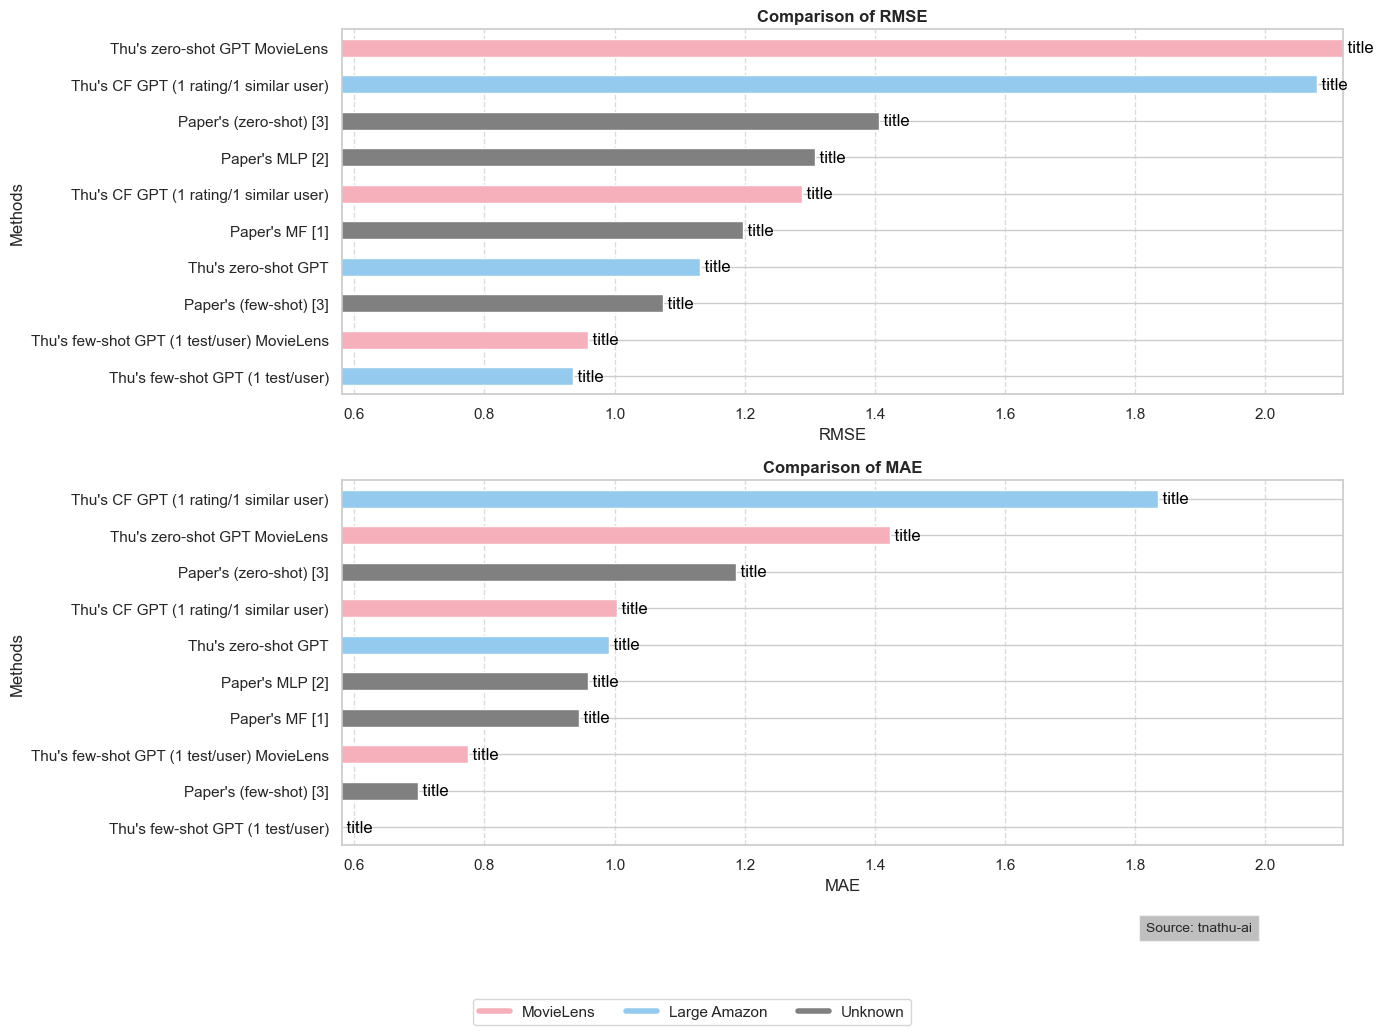

In [16]:


# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette that includes pink
base_palette = sns.color_palette("husl", 3)
small_amazon_base_color = base_palette[0]  # Base color for Small Amazon
large_amazon_base_color = base_palette[2]  # Base color for Large Amazon

# Create lighter colors
small_amazon_color = sns.light_palette(small_amazon_base_color, n_colors=3)[-2]  # Lighter color for Small Amazon
large_amazon_color = sns.light_palette(large_amazon_base_color, n_colors=3)[-2]  # Lighter color for Large Amazon

# Create a color map: a dictionary that maps each unique value in 'Dataset' to a color
color_map = {'MovieLens': small_amazon_color, 'Large Amazon': large_amazon_color}

# Assuming 'df' is your DataFrame and it has columns named 'Dataset', 'RMSE', 'MAE', and 'Methods'
# Map the 'Dataset' column to colors using the color map, handling NaN values
df['color'] = df['Dataset'].map(color_map).fillna("grey")  # Grey color for NaN values

# Update the max and min scale of RMSE and MAE
max_rmse_mae = max(df['RMSE'].max(), df['MAE'].max())
min_rmse_mae = min(df['RMSE'].min(), df['MAE'].min())

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 10))  # Adjusted figure size

# RMSE Plot
df.sort_values(by="RMSE").plot.barh(x="Methods", y="RMSE", ax=ax[0], legend=False, color=df.sort_values(by="RMSE")['color'])
ax[0].set_title("Comparison of RMSE", fontweight='bold')
ax[0].set_xlabel("RMSE")
ax[0].set_ylabel("Methods")
ax[0].grid(axis='x', linestyle='--', alpha=0.7)
ax[0].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar
for index, value in enumerate(df.sort_values(by="RMSE")['RMSE']):
    ax[0].text(value, index, ' ' + df.sort_values(by="RMSE")['Features'].iloc[index], color='black', va="center")

# MAE Plot
df.sort_values(by="MAE").plot.barh(x="Methods", y="MAE", ax=ax[1], legend=False, color=df.sort_values(by="MAE")['color'])
ax[1].set_title("Comparison of MAE", fontweight='bold')
ax[1].set_xlabel("MAE")
ax[1].set_ylabel("Methods")
ax[1].grid(axis='x', linestyle='--', alpha=0.7)
ax[1].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar
for index, value in enumerate(df.sort_values(by="MAE")['MAE']):
    ax[1].text(value, index, ' ' + df.sort_values(by="MAE")['Features'].iloc[index], color='black', va="center")

# Add legend
legend_elements = [Line2D([0], [0], color=small_amazon_color, lw=4, label='MovieLens'),
                   Line2D([0], [0], color=large_amazon_color, lw=4, label='Large Amazon'),
                   Line2D([0], [0], color='grey', lw=4, label='Unknown')]

# Adjusted legend position
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Citing the source to the right below the plot
plt.figtext(0.9, 0.01, "Source: tnathu-ai", ha="right", fontsize=10, bbox={"facecolor":"grey", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusted layout
plt.savefig('../images/comparison_plot.png', bbox_inches='tight')  # Save with tight bounding box
print("Plot saved")
plt.show()

Plot saved


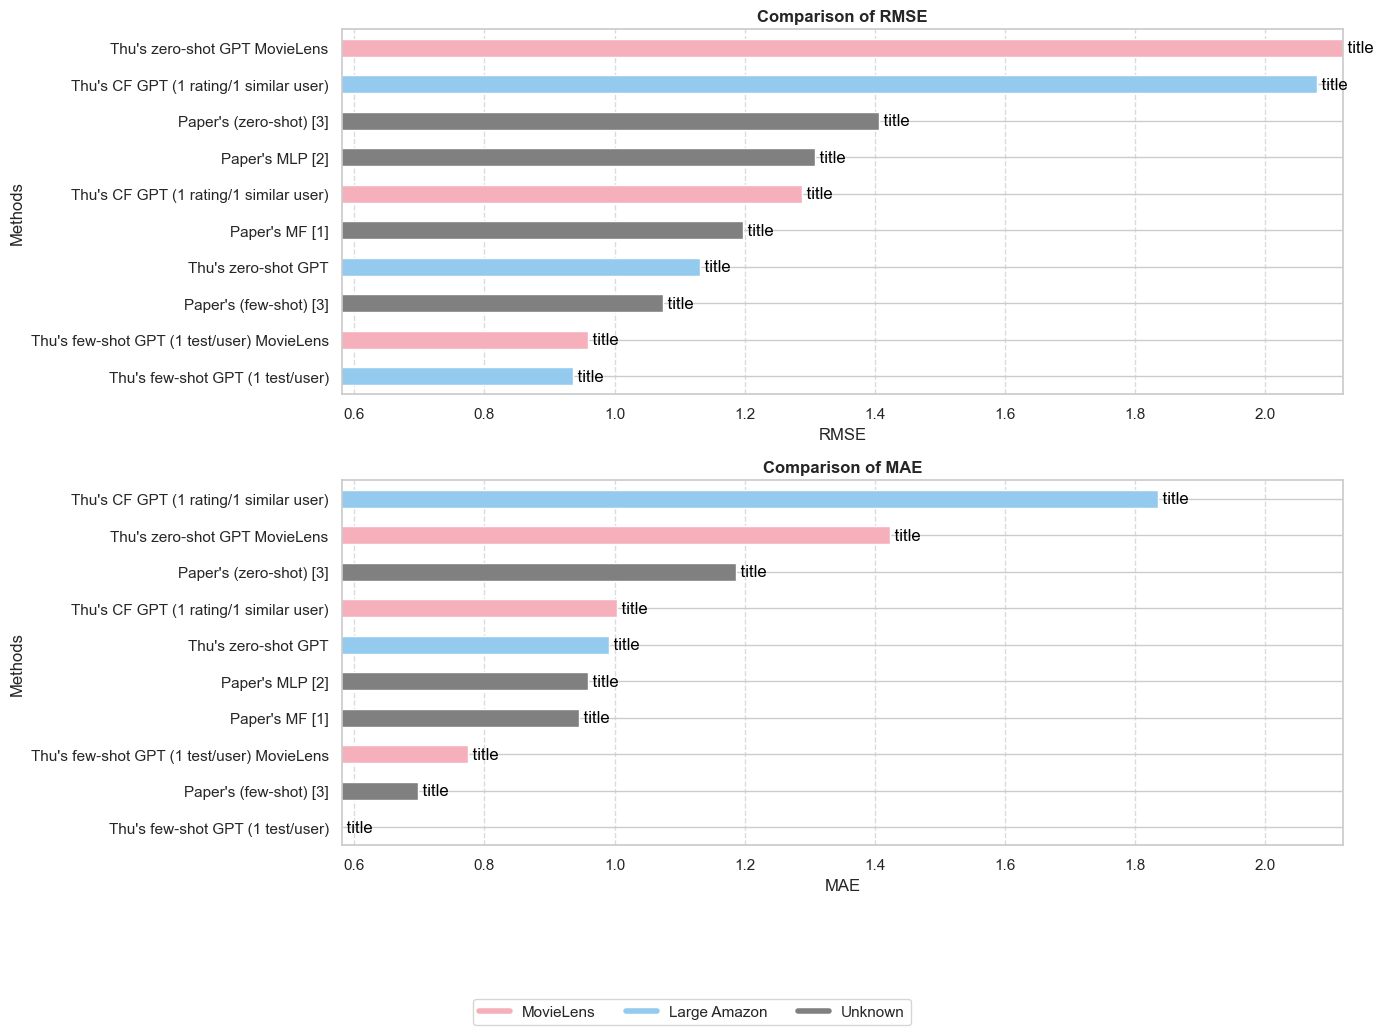

In [17]:


# Choose a colorblind-friendly palette that includes pink
base_palette = sns.color_palette("husl", 3)
small_amazon_base_color = base_palette[0]  # Base color for Small Amazon
large_amazon_base_color = base_palette[2]  # Base color for Large Amazon

# Create lighter colors
small_amazon_color = sns.light_palette(small_amazon_base_color, n_colors=3)[-2]  # Lighter color for Small Amazon
large_amazon_color = sns.light_palette(large_amazon_base_color, n_colors=3)[-2]  # Lighter color for Large Amazon

# Create a color map: a dictionary that maps each unique value in 'Dataset' to a color
color_map = {'MovieLens': small_amazon_color, 'Large Amazon': large_amazon_color}

# Map the 'Dataset' column to colors using the color map, handling NaN values
df['color'] = df['Dataset'].map(color_map).fillna("grey")  # Grey color for NaN values

# Update the max and min scale of RMSE and MAE
max_rmse_mae = max(df['RMSE'].max(), df['MAE'].max())
min_rmse_mae = min(df['RMSE'].min(), df['MAE'].min())

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 10))  # Adjusted figure size

# RMSE Plot
df.sort_values(by="RMSE").plot.barh(x="Methods", y="RMSE", ax=ax[0], legend=False, color=df.sort_values(by="RMSE")['color'])
ax[0].set_title("Comparison of RMSE", fontweight='bold')
ax[0].set_xlabel("RMSE")
ax[0].set_ylabel("Methods")
ax[0].grid(axis='x', linestyle='--', alpha=0.7)
ax[0].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar
for index, value in enumerate(df.sort_values(by="RMSE")['RMSE']):
    ax[0].text(value, index, ' ' + df.sort_values(by="RMSE")['Features'].iloc[index], color='black', va="center")

# MAE Plot
df.sort_values(by="MAE").plot.barh(x="Methods", y="MAE", ax=ax[1], legend=False, color=df.sort_values(by="MAE")['color'])
ax[1].set_title("Comparison of MAE", fontweight='bold')
ax[1].set_xlabel("MAE")
ax[1].set_ylabel("Methods")
ax[1].grid(axis='x', linestyle='--', alpha=0.7)
ax[1].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar
for index, value in enumerate(df.sort_values(by="MAE")['MAE']):
    ax[1].text(value, index, ' ' + df.sort_values(by="MAE")['Features'].iloc[index], color='black', va="center")

# Add legend
legend_elements = [Line2D([0], [0], color=small_amazon_color, lw=4, label='MovieLens'),
                   Line2D([0], [0], color=large_amazon_color, lw=4, label='Large Amazon'),
                   Line2D([0], [0], color='grey', lw=4, label='Unknown')]

# Adjusted legend position
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusted layout
plt.savefig('../images/comparison_plot.png', bbox_inches='tight')  # Save with tight bounding box
print("Plot saved")
plt.show()

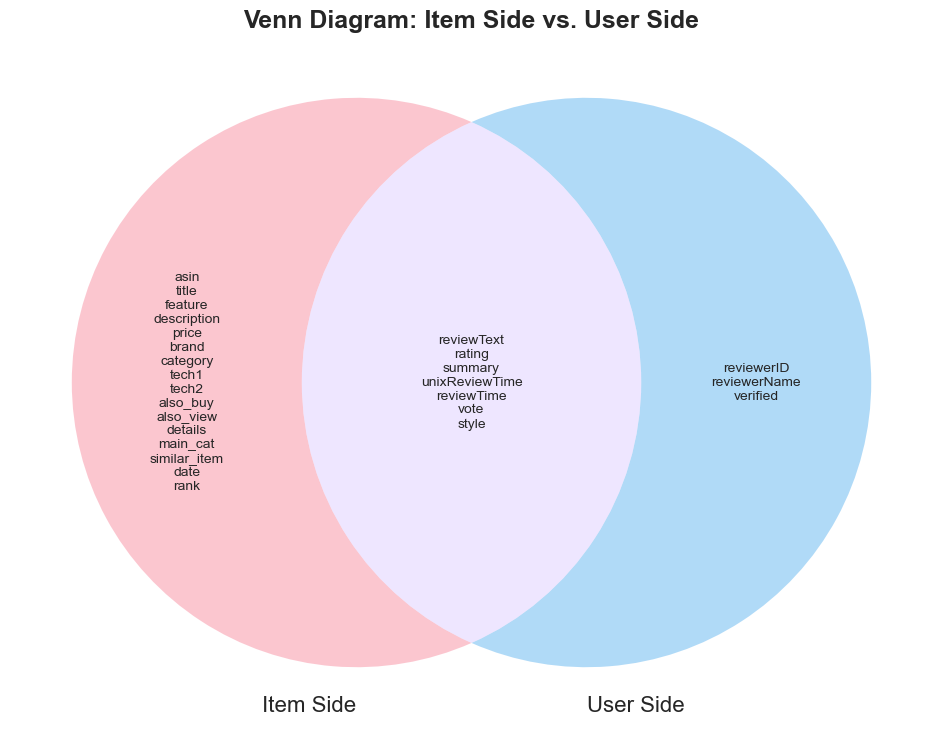

In [33]:
# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette 
palette = sns.color_palette("husl", 3)
item_color = palette[0]  # First color for item side
user_color = palette[2]  # Third color for user side (includes pink)

# Create the Venn diagram
plt.figure(figsize=(12, 9))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"), set_colors=(item_color, user_color))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(16)
for text in venn.subset_labels:
    text.set_fontsize(10)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE))

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=18, fontweight='bold')
plt.show()


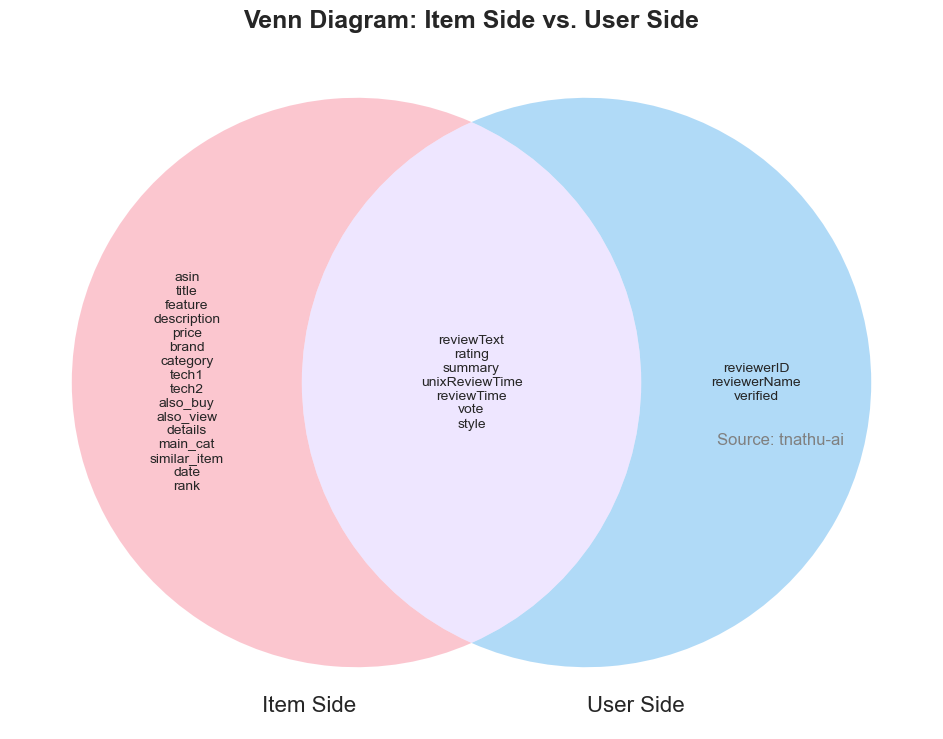

In [39]:
# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette that includes pink
palette = sns.color_palette("husl", 3)
item_color = palette[0]  # First color for item side
user_color = palette[2]  # Third color for user side (includes pink)

# Create the Venn diagram
plt.figure(figsize=(12, 9))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"), set_colors=(item_color, user_color))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(16)
for text in venn.subset_labels:
    text.set_fontsize(10)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE))

# Add the source citation in gray
plt.text(0.5, -0.1, "Source: tnathu-ai", fontsize=12, color='gray', ha='center')

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=18, fontweight='bold')
# plt.savefig('../images/interaction_venn_diagram.png')  # Save the plot
plt.show()
